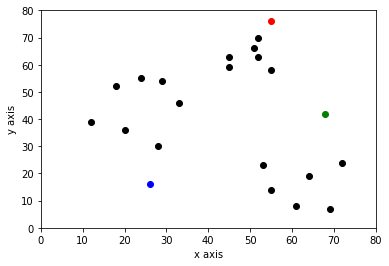

In [194]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from math import sqrt
k=3
df = pd.DataFrame({'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]})


#產生初始隨機點
np.random.seed(200)

rand_coord = {i:[np.random.randint(0,80),np.random.randint(0,80)] for i in range(k)}
color = ['b','g','r']

plt.scatter(df['x'],df['y'],color='black')
for i in rand_coord.keys():
    plt.scatter(rand_coord[i][0],rand_coord[i][1],color=color[i])
    
plt.xlim(0,80);plt.xlabel('x axis')
plt.ylim(0,80);plt.ylabel('y axis')
plt.show()

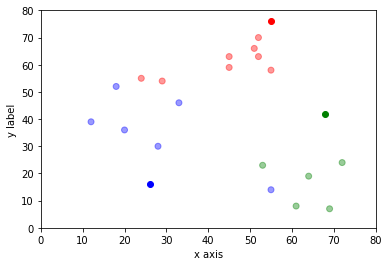

{0: [26, 16], 1: [68, 42], 2: [55, 76]}


In [195]:
def distance(df,rand_coord):
    
    for i in rand_coord.keys():
        df['distance from '+str(i)]=np.sqrt((df['x']-rand_coord[i][0])**2+(df['y']-rand_coord[i][1])**2)
    t = df.loc[:,['distance from 0','distance from 1','distance from 2']]
    t = t.idxmin(axis=1)#find a row's minimun column 
    t = t.map(lambda x:int(x.lstrip('distance from ')))#截除掉distane from 
    df['closest'] = t 
    df['color'] = df['closest'].map(lambda x:color[x])
    
distance(df,rand_coord)


plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.4)
for i in rand_coord.keys():
    plt.scatter(rand_coord[i][0],rand_coord[i][1],color=color[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.xlabel('x axis')
plt.ylabel('y label')
plt.show()
print(rand_coord)

{0: [26, 16], 1: [68, 42], 2: [55, 76]}
{0: [27.666666666666668, 36.166666666666664], 1: [63.8, 16.2], 2: [44.125, 61.0]}


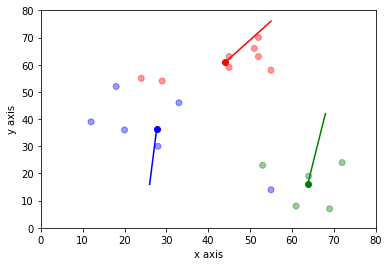

In [196]:
#更新 新的基準點
import copy
old_rand_cord = copy.deepcopy(rand_coord)
print(rand_coord)
def update_coord(rand_coord):#k numbers
    for i in rand_coord.keys():
        icolor_point_x= df[df['closest']==i]['x']
        icolor_point_y= df[df['closest']==i]['y']
        rand_coord[i][0] = np.mean(icolor_point_x)#x
        rand_coord[i][1] = np.mean(icolor_point_y)#y
    return rand_coord

rand_coord = update_coord(rand_coord)
print(rand_coord)

plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.4)
for i in rand_coord.keys():
    plt.scatter(rand_coord[i][0],rand_coord[i][1],color=color[i])
    plt.plot((old_rand_cord[i][0],rand_coord[i][0]),(old_rand_cord[i][1],rand_coord[i][1]),color=color[i])

plt.xlim(0,80)
plt.ylim(0,80)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

In [197]:
print(rand_coord)
print(old_rand_cord)


{0: [27.666666666666668, 36.166666666666664], 1: [63.8, 16.2], 2: [44.125, 61.0]}
{0: [26, 16], 1: [68, 42], 2: [55, 76]}


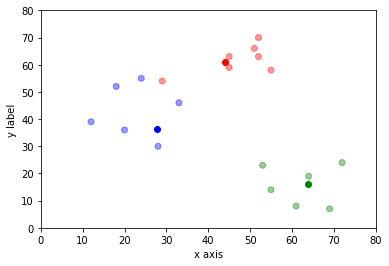

{0: [27.666666666666668, 36.166666666666664], 1: [63.8, 16.2], 2: [44.125, 61.0]}


In [198]:
#經過更新後 重新分類的結果

distance(df,rand_coord)
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.4)
for i in rand_coord.keys():
    plt.scatter(rand_coord[i][0],rand_coord[i][1],color=color[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.xlabel('x axis')
plt.ylabel('y label')
plt.show()
print(rand_coord)

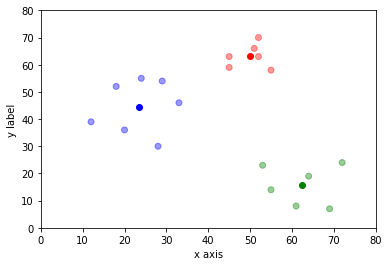

In [201]:
#之後就要一直loop 直到更新點沒變化很大
while True:
    closest = df['closest'].copy(deep=True)
    rand_coord = update_coord(rand_coord)
    distance(df,rand_coord)
    if closest.equals(df['closest']):
        break

plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.4)
for i in rand_coord.keys():
    plt.scatter(rand_coord[i][0],rand_coord[i][1],color=color[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.xlabel('x axis')
plt.ylabel('y label')
plt.show()
    